In [278]:
## Chapter 1
import numpy as np
rng = np.random.default_rng()

import pandas as pd

In [279]:
N = 100
t_max = 100

In [280]:
population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True)})
population

,trait
0,A
1,B
2,A
3,A
4,A
...,...
95,A
96,A
97,B
98,A


In [281]:
output = pd.DataFrame({"generation": np.arange(t_max, dtype=int), "p": [np.nan] * t_max })
output

,generation,p
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
95,95,NaN
96,96,NaN
97,97,NaN
98,98,NaN


In [282]:
output.loc[0, "p"] = population[ population["trait"] == "A" ].shape[0] / N

In [283]:
for t in range(1, t_max):
    # Copy the population tibble to previous_population tibble
    previous_population = population.copy()
  
    # Randomly copy from previous generation's individuals
    population = population["trait"].sample(N, replace=True).to_frame()
    
    # Get p and put it into the output slot for this generation t
    output.loc[t, "p"] = population[ population["trait"] == "A"].shape[0] / N

In [284]:
output

,generation,p
0,0,0.56
1,1,0.54
2,2,0.54
3,3,0.53
4,4,0.53
...,...,...
95,95,0.74
96,96,0.73
97,97,0.70
98,98,0.70


In [286]:
def unbiased_transmission_1(N, t_max):
    population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True)})
    output = pd.DataFrame({"generation": np.arange(t_max, dtype=int), "p": [np.nan] * t_max })
    output.loc[0, "p"] = population[ population["trait"] == "A" ].shape[0] / N

    for t in range(1, t_max):
        # Copy the population tibble to previous_population tibble
        previous_population = population.copy()
    
        # Randomly copy from previous generation's individuals
        population = population["trait"].sample(N, replace=True).to_frame()
        
        # Get p and put it into the output slot for this generation t
        output.loc[t, "p"] = population[ population["trait"] == "A"].shape[0] / N
    
    return output

In [319]:
data_model = unbiased_transmission_1(N=100, t_max=200)

In [320]:
def plot_single_run(data_model):
    data_model["p"].plot(ylim=(0,1))

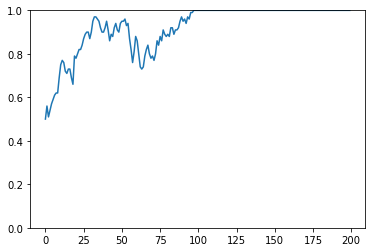

In [321]:
plot_single_run(data_model)

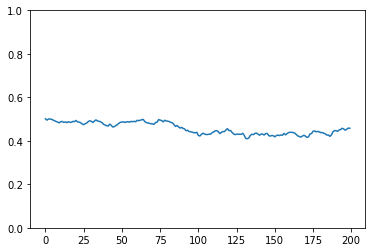

In [340]:
data_model = unbiased_transmission_1(N=10_000, t_max=200)
plot_single_run(data_model)

In [291]:
def unbiased_transmission_2(N, t_max, r_max):
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })

    for r in range(r_max):
        # Create first generation
        population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True)})

        # Add first generation's p for run r
        output.loc[ r * t_max, "p"] = population[ population["trait"] == "A" ].shape[0] / N

        # For each generation 
        for t in range(1,t_max):
            # Copy individuals to previous_population DataFrame
            previous_population = population.copy()

            # Randomly compy from previous generation 
            population = population["trait"].sample(N, replace=True).to_frame()

            # Get p and put it into output slot for this generation t and run r
            output.loc[r * t_max + t, "p"] = population[ population["trait"] == "A" ].shape[0] / N

    return output

In [341]:
unbiased_transmission_2(100, 100, 3)

,generation,p,run
0,0,0.51,0
1,1,0.50,0
2,2,0.55,0
3,3,0.58,0
4,4,0.61,0
...,...,...,...
295,95,0.23,2
296,96,0.25,2
297,97,0.23,2
298,98,0.26,2


In [342]:
data_model = unbiased_transmission_2(N=100, t_max=200, r_max=5)

In [343]:
def plot_multiple_runs(data_model):
    groups = data_model.groupby("run")
    for _, g in groups:
        g.index = g["generation"]
        g["p"].plot(lw=.5, ylim=(0,1))

    data_model.groupby("generation")["p"].mean().plot(c="k", lw="1")

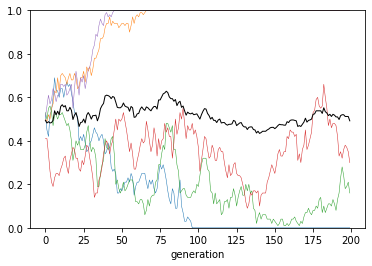

In [344]:
plot_multiple_runs(data_model)

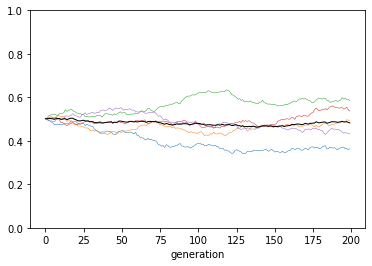

In [345]:
data_model = unbiased_transmission_2(N=10_000, t_max=200, r_max=5)
plot_multiple_runs(data_model)

In [346]:
def unbiased_transmission_3(N, p_0, t_max, r_max):
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })

    for r in range(r_max):
        # Create first generation
        population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True, p=[p_0, 1 - p_0])})

        # Add first generation's p for run r
        output.loc[ r * t_max, "p"] = population[ population["trait"] == "A" ].shape[0] / N

        # For each generation 
        for t in range(1,t_max):
            # Copy individuals to previous_population DataFrame
            previous_population = population

            # Randomly compy from previous generation 
            population = population["trait"].sample(N, replace=True).to_frame()

            # Get p and put it into output slot for this generation t and run r
            output.loc[r * t_max + t, "p"] = population[ population["trait"] == "A" ].shape[0] / N

    return output

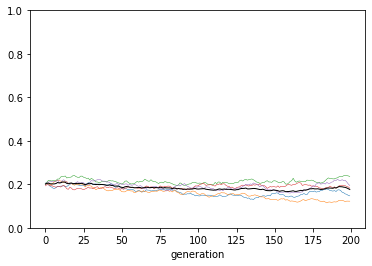

In [347]:
data_model = unbiased_transmission_3(10_000, p_0=.2, t_max=200, r_max=5)
plot_multiple_runs(data_model)